<a href="https://colab.research.google.com/github/avionerman/machine_learning_2025/blob/main/Exercise_2_Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εισαγωγή Βιβλιοθηκών

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text


# Ερώτημα 1

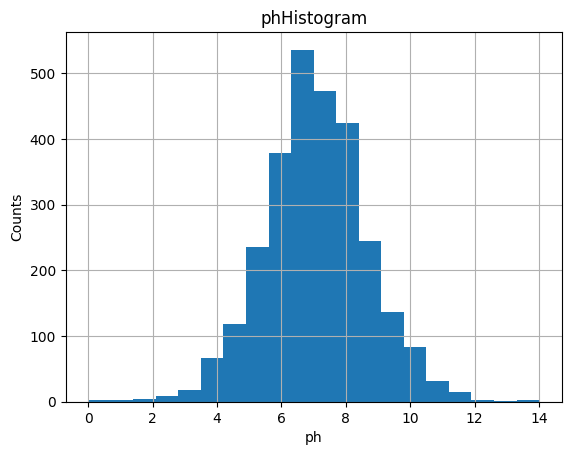

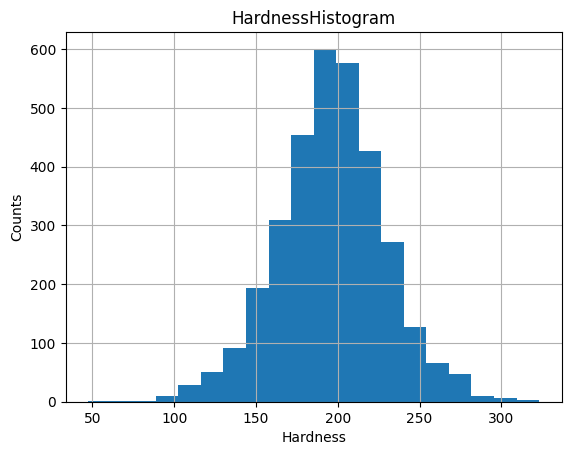

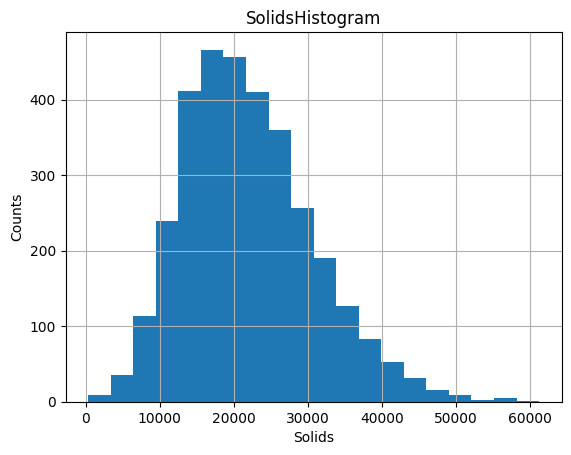

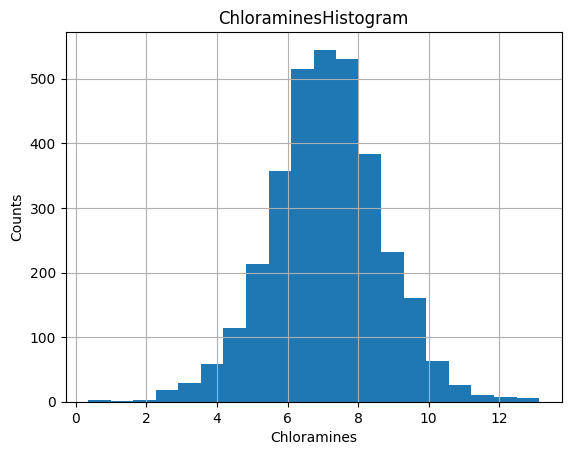

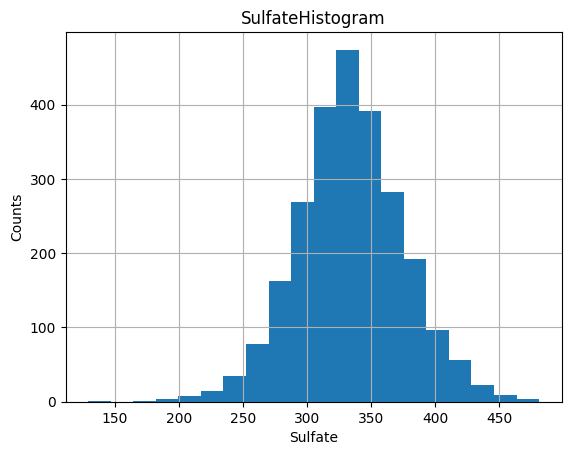

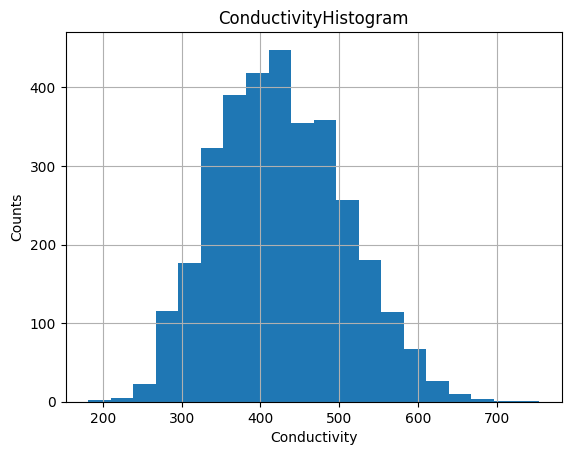

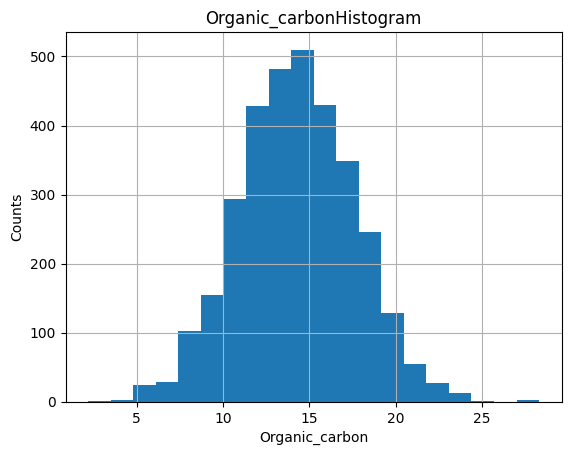

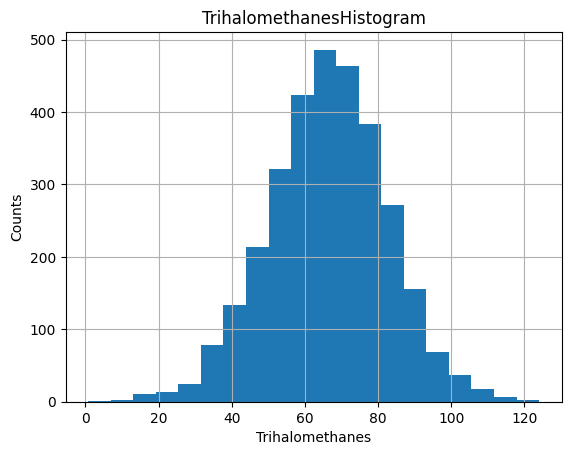

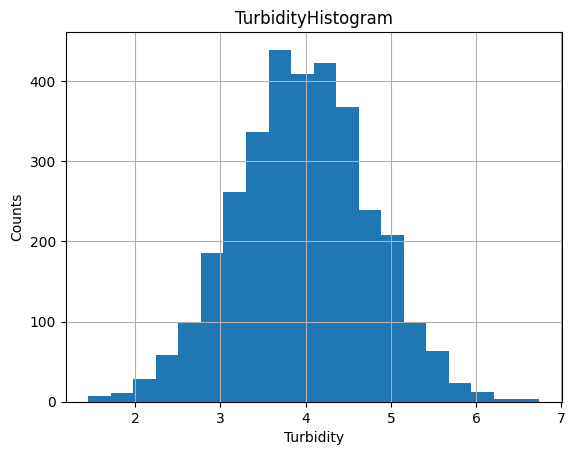

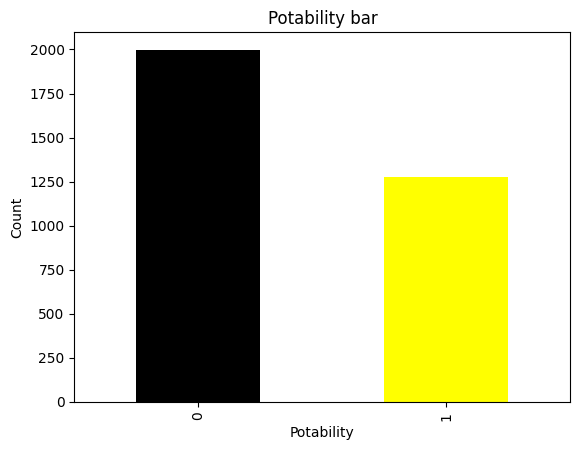

In [39]:
df = pd.read_csv('water_potability.csv')

# create histrograms
for x in df.drop(columns=['Potability']):
  df[x].hist(bins=20)
  plt.title(x + 'Histogram')
  plt.xlabel(x)
  plt.ylabel('Counts')
  plt.show()

counts = df['Potability'].value_counts()
counts.plot(kind='bar', color=['black', 'yellow'])
plt.title('Potability bar')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

potability_perc = df['Potability'].value_counts(normalize=True) * 100
# print(potability_perc)

[1] Θεωρώ πως η ποιότητα των δεδομένων είναι ελλειπής καθώς λείπουν τιμές στα attributes **ph**, **Sulfate** & **Trihalomethanes**.

[2] Επίσης, το ποσοστό του πόσιμου νερού είναι περίπου 60%, επομένως το 40% είναι μη πόσιμο. Το ότι υπάρχει τέτοια απόκλιση ίσως να επηρεάσει το αποτέλεσμα του αλγορίθμου εκμάθησης.

# Ερώτημα 2

In [40]:
# θεωρώ πως όσα στοιχεία δεν έχουν ph πρέπει να φύγουν από το δείγμα
df_ph_categories = df.dropna(subset=['ph']).copy()

bins = [-float('inf'), 6.5, 8.5, float('inf')]
labels = ['<6.5', '6.5-8.5', '>8.5']
df_ph_categories['pH_range'] = pd.cut(df_ph_categories['ph'], bins=bins, labels=labels)

# calculate % for each category
potability_per_ph_category = df_ph_categories.groupby(['pH_range', 'Potability'], observed=False).size().unstack(fill_value=0)
potability_per_ph_category_perc = potability_per_ph_category.div(potability_per_ph_category.sum(axis=1), axis=0) * 100

print(potability_per_ph_category_perc)
print('\n')
print(potability_per_ph_category)

Potability          0          1
pH_range                        
<6.5        63.223140  36.776860
6.5-8.5     56.099398  43.900602
>8.5        66.871166  33.128834


Potability    0    1
pH_range            
<6.5        612  356
6.5-8.5     745  583
>8.5        327  162


Σύμφωνα με τα αποτελέσματα, το μεγαλύτερο ποσοστό πόσιμου νερού βρίσκεται μεταξύ 6.5 και 8.5. Επομένως επαληθεύεται ο ΠΟΥ. Μάλιστα, τα ποσοστά αυτά έχουν προκύψει και με μεγαλύτερο πλήθος δεδομένων (1328) έναντι των υπόλοιπων κατηγοριών (1457), δημιουργώντας έτσι και μεγαλύτερη βεβαιότητα για τη συγκεκριμένη κατηγορία.

# Ερώτημα 3

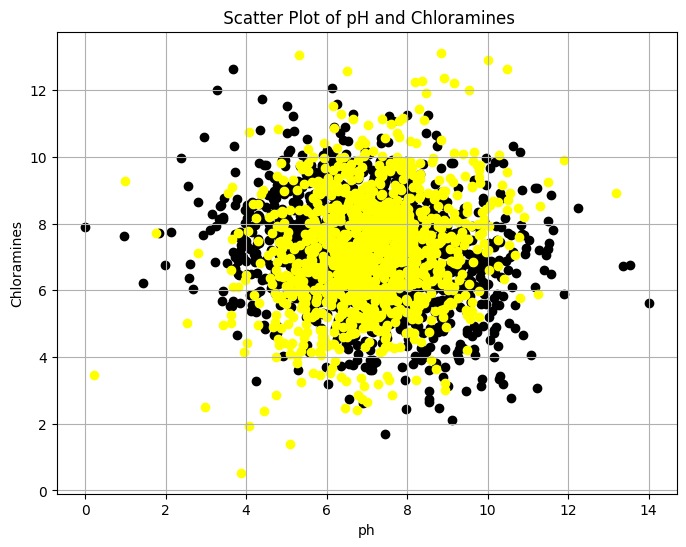

In [41]:
df_ph = df['ph']
df_chloramine = df['Chloramines']

df_scatter = df.dropna(subset=['ph', 'Chloramines'])

plt.figure(figsize=(8,6))
plt.scatter(
    df_scatter[df_scatter['Potability'] == 0]['ph'],
    df_scatter[df_scatter['Potability'] == 0]['Chloramines'],
    color='black',
    label='non-potable'
)

plt.scatter(
    df_scatter[df_scatter['Potability'] == 1]['ph'],
    df_scatter[df_scatter['Potability'] == 1]['Chloramines'],
    color='yellow',
    label='potable'
)

plt.xlabel('ph')
plt.ylabel('Chloramines')
plt.title(' Scatter Plot of pH and Chloramines')
plt.grid(True)
plt.show()

Υπάρχει μεγάλη επικάλυψη, άρα δεν υπάρχει καποιος διαχωρισμός μεταξύ των 2 attributes (γραμμικός, ή οποιοσδήποτε άλλος). Ως συμπέρασμα, αυτές οι 2 μεταβλητές μόνες τους, δεν μπορούν να μας πουν εάν το νερό είναι πόσιμο ή οχι.

# Ερώτημα 4

In [42]:
df_filled_attributes = df.drop(columns=['Potability'])
y = df['Potability']
df_filled_gaps = df_filled_attributes.fillna(df_filled_attributes.mean())
print(df_filled_gaps.count())
print(df['Potability'].count())


ph                 3276
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            3276
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3276
Turbidity          3276
dtype: int64
3276


# Ερώτημα 5

In [43]:
seed = 0
test_size = 0.3
x = df_filled_gaps
y = df['Potability']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2293, 9), (983, 9), (2293,), (983,))

# Ερώτημα 6

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
test_accurancy = accuracy_score(y_test, model.predict(x_test))
train_accurancy = accuracy_score(y_train, model.predict(x_train))
print(f'test accuracy: {test_accurancy}')
print(f'train accuracy: {train_accurancy}')



test accuracy: 0.5879959308240081
train accuracy: 1.0


# Ερώτημα 7

In [45]:
criteria = ['gini', 'entropy']
max_depth = [None, 3, 5]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
max_features = [None, 'sqrt']
cost_complexity_pruning = [0.0, 0.01]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

outcome = {
    "criterion": [],
    "max_depth": [],
    "min_samples_split": [],
    "min_samples_leaf": [],
    "max_features": [],
    "cost_complexity_pruning": [],
    "train_acc": [],
    "test_acc": []
}

for c in criteria:
    for md in max_depth:
        for mss in min_samples_split:
            for msl in min_samples_leaf:
                for mf in max_features:
                    for ccp in cost_complexity_pruning:

                        tree = DecisionTreeClassifier(
                            random_state=0,
                            criterion=c,
                            max_depth=md,
                            min_samples_split=mss,
                            min_samples_leaf=msl,
                            max_features=mf,
                            ccp_alpha=ccp,
                        )

                        tree.fit(x_train, y_train)
                        # train_acc = tree.score(x_train, y_train)
                        train_acc = accuracy_score(y_train, tree.predict(x_train))
                        test_acc = accuracy_score(y_test, tree.predict(x_test))

                        outcome["criterion"].append(c)
                        outcome["max_depth"].append(md)
                        outcome["min_samples_split"].append(mss)
                        outcome["min_samples_leaf"].append(msl)
                        outcome["max_features"].append(mf)
                        outcome["cost_complexity_pruning"].append(ccp)
                        outcome["train_acc"].append(train_acc)
                        outcome["test_acc"].append(test_acc)

df_outcome = pd.DataFrame(outcome)
print(df_outcome.sort_values(by="test_acc", ascending=False).head())


   criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
40      gini        5.0                  5                 1         None   
44      gini        5.0                  5                 2         None   
36      gini        5.0                  2                 2         None   
32      gini        5.0                  2                 1         None   
88   entropy        5.0                  5                 1         None   

    cost_complexity_pruning  train_acc  test_acc  
40                      0.0   0.680768  0.639878  
44                      0.0   0.679895  0.639878  
36                      0.0   0.679895  0.639878  
32                      0.0   0.681204  0.638861  
88                      0.0   0.678151  0.636826  


# Ερώτημα 8

criterion                      gini
max_depth                       3.0
min_samples_split                 2
min_samples_leaf                  1
max_features                   None
cost_complexity_pruning         0.0
train_acc                  0.647187
test_acc                   0.621567
Name: 16, dtype: object


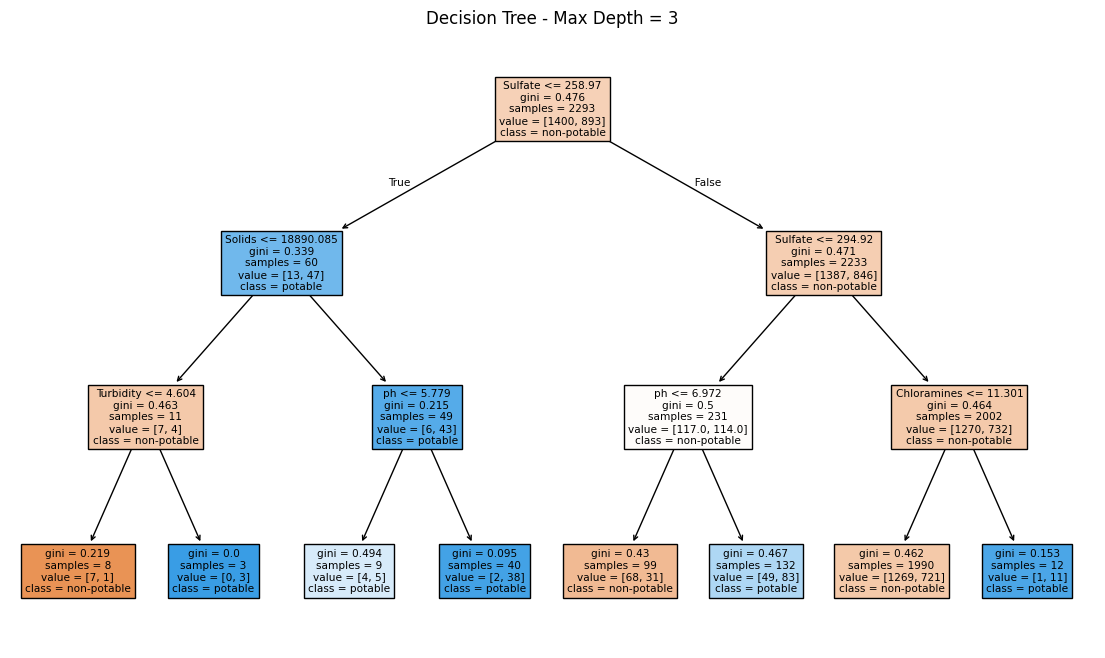

|--- Sulfate <= 258.97
|   |--- Solids <= 18890.08
|   |   |--- Turbidity <= 4.60
|   |   |   |--- class: 0
|   |   |--- Turbidity >  4.60
|   |   |   |--- class: 1
|   |--- Solids >  18890.08
|   |   |--- ph <= 5.78
|   |   |   |--- class: 1
|   |   |--- ph >  5.78
|   |   |   |--- class: 1
|--- Sulfate >  258.97
|   |--- Sulfate <= 294.92
|   |   |--- ph <= 6.97
|   |   |   |--- class: 0
|   |   |--- ph >  6.97
|   |   |   |--- class: 1
|   |--- Sulfate >  294.92
|   |   |--- Chloramines <= 11.30
|   |   |   |--- class: 0
|   |   |--- Chloramines >  11.30
|   |   |   |--- class: 1

0 258.97027587890625
1 18890.0849609375
2 4.603536367416382
3 -2.0
4 -2.0
5 5.778854846954346
6 -2.0
7 -2.0
8 294.9199523925781
9 6.971670389175415
10 -2.0
11 -2.0
12 11.301110744476318
13 -2.0
14 -2.0


In [46]:
best_max_depth_3 = df_outcome[df_outcome["max_depth"] == 3].sort_values(by="test_acc", ascending=False).iloc[0]
print(best_max_depth_3)

best_tree = DecisionTreeClassifier(
    criterion=best_max_depth_3["criterion"],
    max_depth=3,
    min_samples_split=best_max_depth_3["min_samples_split"],
    min_samples_leaf=best_max_depth_3["min_samples_leaf"],
    max_features=best_max_depth_3["max_features"],
    ccp_alpha=best_max_depth_3["cost_complexity_pruning"],
    random_state=0
)
best_tree.fit(x_train, y_train)

plt.figure(figsize=(14,8))
plot_tree(best_tree, feature_names=x.columns, class_names=["non-potable", "potable"], filled=True)
plt.title("Decision Tree - Max Depth = 3")
plt.show()

print(export_text(best_tree, feature_names=list(x.columns)))

for i, threshold in enumerate(best_tree.tree_.threshold):
    print(i, threshold)


Αν το Sulfate είναι μεταξύ 260.92 και 296.08 τότε το νερό δεν είναι πόσιμο.
Αν το Sulfate ειναι κάτω από το 260.92, ελέγχουμε εάν το Solids είναι κάτω από 18346,2. Αν είναι, τότε ελέγχουμε και το pH αν είναι κάτω από 7.947. Εάν επίσης είναι, τότε το νερό δεν είναι πόσιμο.

Τώρα, αν το Sulfate είναι άνω του 296.08, και το pH είναι μικρότερο του 7.83 τότε το νερό είναι πόσιμο, ενώ αν το τελευταίο είναι άνω του 7.83 τότε δεν είναι πόσιμο.

Άρα υψηλό Sulfate και όχι υψηλό pH κάνουν το νερό πόσιμο και εάν το Sulfate και το Solids είναι χαμηλά αλλά το pH όχι τόσο χαμηλό τότε επίσης το νερό είναι πόσιμο.

Υψηλό Sulfate -> έλεγχος pH
Χαμηλό Sulfate + Χαμηλό Solids -> έλεγχος pH

# Ερώτημα 9

In [47]:
best_overall_dt = df_outcome.sort_values(by="test_acc", ascending=False).iloc[0]

max_depth_value = None if pd.isna(best_overall_dt["max_depth"]) else int(best_overall_dt["max_depth"])
min_split = int(best_overall_dt["min_samples_split"])
min_leaf = int(best_overall_dt["min_samples_leaf"])
ccp = float(best_overall_dt["cost_complexity_pruning"])
max_features_value = (None if (best_overall_dt["max_features"] is None or best_overall_dt["max_features"]=="None")
                      else best_overall_dt["max_features"])

refited_final_tree = DecisionTreeClassifier(
    criterion=best_overall_dt["criterion"],
    max_depth=max_depth_value,
    min_samples_split=min_split,
    min_samples_leaf=min_leaf,
    max_features=max_features_value,
    ccp_alpha=ccp,
    random_state=0
)
refited_final_tree.fit(x_train, y_train)

feat = pd.DataFrame({
    "Feature": x.columns,
    "Importance": refited_final_tree.feature_importances_
}).sort_values("Importance", ascending=False).reset_index(drop=True)

print(feat)

           Feature  Importance
0               ph    0.291938
1          Sulfate    0.266901
2      Chloramines    0.152954
3         Hardness    0.119144
4           Solids    0.110540
5        Turbidity    0.027599
6  Trihalomethanes    0.025840
7     Conductivity    0.005084
8   Organic_carbon    0.000000


Χρησ/ντας το παραπάνω αποτέλεσμα, φαίνεται πως το πιο σημαντικό attribute είναι το Sulfate το οποίο είναι σχεδόν ίσης σημασίας και σημαντικότητας με το ίδιο το pH που αποτελεί το τελευταίο επίπεδο σημαντικότητας για το αν το νερό είναι πόσιμο ή οχι. Τέλος, μετά την επανεκπαίδευση του δέντρου, τα πιο σημαντικά attributes φαίνεται να είναι τα Sulfate, pH, Hardness, Solids and Chloramines (λίγο και το Conductivity). Επομένως, σε μια επανεκπαίδευση του δέντρου, η χρήση αυτών των attributes θα ήταν ιδανική, καθώς φαίνεται να επηρεάζουν την αποτελεσματικότητά του.

# Ερώτημα 10

Από τη στιγμή που το Random Forest, απευθείνεται όχι σε ένα δέντρο αλλά πολλά σημαίνει πως έχει τη δυνατότητα να "εξερευνεί" περισσότερα μονοπάτια βρίσκοντας το πιο βέλτιστο.

Πιο συγκεκριμένα, το κάθε δέντρο εκπαιδεύεται με διαφορετικό τυχαίο υποσύνολο από τα δεδομένα μας (μειώνει και την πιθανότητα για overfitting).

Ένα ακόμα σημαντικό στοιχείο είναι πως το RF σε σχέση με το DT, δεν επιτρέπει την χρήση όλων των attributes που έχουμε σε κάθε υποδέντρο του (λιγότερη συσχέτιση μεταξύ των δέντρων λόγω τυχαιότητας χρήσης των attributes).

Τέλος, θα έλεγα πως επειδή το κάθε δέντρο "ψηφίζει" στο τέλος, τα πιθανά λάθη που μπορεί να υπάρχουν σε κάποια δέντρα θα αφαιρεθούν από την εξίσωση καθώς δε θα λάβουν πολλές ψήφους και έτσι δε θα αλλοιώσουν το αποτέλεσμα.

# Ερώτημα 11

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

random_f_results = []
n_estimators = [50, 100, 200]

for ne in n_estimators:
    r_f_c = RandomForestClassifier(n_estimators=ne, random_state=0, max_features="sqrt")
    r_f_c.fit(x_train, y_train)

    random_f_results.append([ne,
                       accuracy_score(y_train, r_f_c.predict(x_train)),
                       accuracy_score(y_test, r_f_c.predict(x_test))])

random_forest_results_df = pd.DataFrame(random_f_results, columns=["n_estimators", "train_acc", "test_acc"])
print(random_forest_results_df)

   n_estimators  train_acc  test_acc
0            50        1.0  0.664293
1           100        1.0  0.666328
2           200        1.0  0.660224


# Ερώτημα 12-13

[12]: Πιστεύω πως είναι καλύτερα να χάσει ακρίβεια από το πόσιμο, παρά να μη βρίσκει τι κάνει depict το μη πόσιμο. Το θεωρώ πιο ασφαλές - **must**, ενώ το κομμάτι της ανάλυσης του ήδη πόσιμο είναι σαν **good to have**. Καλύτερα να μη χρησ/ουμε πόσιμο νερό διότι το χαρ/σαμε ως μη πόσιμο, παρά να χρησ/ουμε μη πόσιμο νερό ως πόσιμο.

[13]: Θα έλεγα το RF, γιατί έχει καλύτερη ακρίβεια και μειώνεται έτσι η πιθανότητα να χαρακτηριστεί μη πόσιμο νερό ως πόσιμο. Πιστεύω ότι μας ενδιαφέρει παραπάνω η υγεία παρά το επίπεδο ποσιμότητας του ήδη πόσιμου νερού. Ενώ με το DT, αυξάνεται η πιθανότητα να βρούμε λάθος λόγω overfitting που στη συγκεκριμένη περίπτωση μπορεί να μας κόστιζε σε θέματα υγείας.